# GRIP@THE SPARK FOUNDATION INTERNSHIP #JAN'2021 TASK#1 PRESENTATION

# TOPIC: Prediction using Supervised ML

# Author: ALAEBO CHINONSO GOSPEL.

### **Simple Linear Regression**
Linear regression is one of the most well-known and well-understood algorithms in statistics and machine learning.
In this regression task i will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
I will demonstrate linear regression with scikit-learn machine learning module and statsmodel library.

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
Data = pd.read_csv(url)
print("Data imported successfully")

Data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30



## REGRESSION MODEL EXPLANATION

-----

Linear regression is a linear model that assumes a linear relationship between the input variables (x or independent variable) and the single output variable (y or dependent variable). More specifically, that y can be calculated from a linear combination of the input variables (x). It constructs a simple model, such as
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$
from a data set. This model builds on assumptions (such as the y and x are linearly dependent and any errors in the regression are normally distributed), to build a model from the independent variables (i.e., $x_1..x_n$) for the dependent variable ($y$). In some application areas, the independent variables are known as the predictors, while the dependent variable is known as the response variable. If only one feature is used ($x$), the technique is known as simple linear regression, while if more than one feature is used ($x_1, x_2, ..., x_n$), the technique is known as multiple linear regression.

To make it simple, we start with simple linear regression. The simple linear model relates the independent variables $x_i$ to the dependent variables $y_i$ via two parameters: an intercept, and a slope. Mathematically, we express this relation in the following form:

$\hat{y}_i = \beta_0 + \beta_1  x_i$  
$y_i = \hat{y}_i + \epsilon_i$ = $\beta_0 + \beta_1  x_i + \epsilon_i$  


Where $y_i$ is the observed dependent variable and $\hat{y}_i$ is the value predicted by the linear model. $\epsilon_i$ accounts for the difference between the model predicted value $\hat{y}_i$ and the observed value $y_i$ for each data point $x_i$. If we have a perfect model, these errors, $\epsilon_i$, are all zero, and $y_i = \hat{y}_i$. In real life, however, the error terms rarely vanish because even if the original relationship is perfect noise creeps into the measurement process.

# **VISUALIZATION OF DATA IN 2-D**

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following CODES:

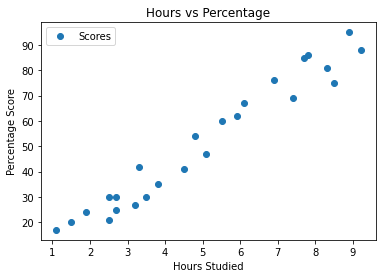

In [5]:
Data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# **INTERPRETATON**
From the **PLOT** above, we can see clearly that there is a strong positive linear relationship between the number of hours studied and percentage of score which is one of the assumptions of linear regression.

### **Data Preparation**

Before computing a linear regression to the data, we must first process these data to  make them ready for the `LinearRegression` estimator
The next step is to divide the data into "independent variable" (inputs) and "dependent variable" (outputs).

In [6]:
#import patsy as pts 

# Create dependent and independent variables
#y, x = pts.dmatrices('Scores ~ Hours', data=Data, return_type='dataframe')


x = Data.iloc[:, :-1].values  
y = Data.iloc[:, 1].values 

Now we will split the dataset to training and testing. We set `random_state` to ensure repeatability.

In [7]:
from sklearn.model_selection import train_test_split
ind_train, ind_test, dep_train, dep_test = train_test_split(x, y, test_size=0.2, random_state=2)

### Linear Regression

With these data, we can now employ the scikit-learn library’s linear regression estimator to generate a linear model for these data. In the following Code cells, we use the `LinearRegression` estimator to fit our sample data, plot the results, and finally display the fit coefficients.

After the model is trained, we can get coefficients from `model.coef_`. As a result, we display the regression formula with the coefficients. We also print the regression score which is $R^2$ of the linear regression.

In [8]:
from sklearn.linear_model import LinearRegression

# Create and fit our linear regression model to training data
model = LinearRegression()
model.fit(ind_train, dep_train)
print("Training completed.")

Training completed.


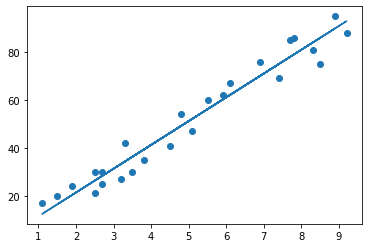

In [9]:
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# REGRESSION MODEL ESTIMATED

In [10]:
# Display model fit parameters for training data
print(f"Scores = {model.intercept_} + " + \
      f"{model.coef_} Hours")

Scores = 1.5079104828268655 + [9.94061514] Hours


# **interpretation**
A "unit" increase in reading hours is associated with a 10.28085594 "unit" increase in scores

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions using our test data.

In [11]:
# Compute model predictions for test data
results = model.predict(ind_test)
print(ind_test)

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [12]:
#ind_test=[m  for n in ind_test for m in n]

In [13]:
results

array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

In [14]:
df = pd.DataFrame({'Actual': dep_test, 'Predicted': results})  
df

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


In [15]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
a=9.25
hours = [[9.25]]
my_pred = model.predict(hours)
print("if a student studies for = {} hours".format(a) )
print(" The Predicted Score will be = {}".format(my_pred[0]))

if a student studies for = 9.25 hours
 The Predicted Score will be = 93.45860055685802


### **Evaluating the model**

The final step is to evaluate the performance of Model. This step is particularly important to compare how well different Model perform on a particular dataset. For simplicity here, we have chosen the model score(Coefficient of Determination) and mean square error. There are many such metrics.

In [16]:
# Compute score and display result (Coefficient of Determination)
score = model.score(ind_test, dep_test)
print(f'LR Model score = {score:4.3f}')


LR Model score = 0.974


# **interpretation of coefficient of determination**
coefficient of determination is how well the regression model fits the observed data. Here, a coefficient of determination of 0.974 shows that 97.4% of the data fit the regression model which indicate good model.

# **OTHER EVALUATION METRICS**

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(dep_test, results)) 
print("   ")
print('mean_squared_error:', metrics.mean_squared_error(dep_test, results))

Mean Absolute Error: 4.877039354964483
   
mean_squared_error: 24.387620339856632
